# Data Preparation

In [1]:
# importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset loading

In [2]:
# dataset path
dataset_path = "../dataset/diabetes.csv"

# importing dataset and converting data into pandas dataframe
df = pd.read_csv(dataset_path)

### Data preview

In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 1. Handling missing values

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### As we can see there is no any missing values in this dataset.

### 2. Outlier detection

#### Outlier visualization of Pregnancies

<Axes: ylabel='Pregnancies'>

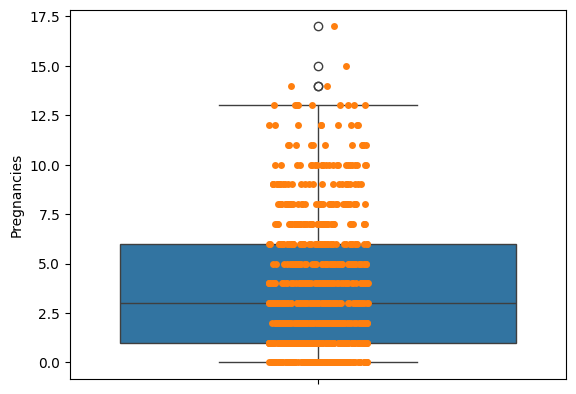

In [5]:
sns.boxplot(data=df["Pregnancies"])
sns.stripplot(data=df["Pregnancies"])

##### As we can see few data are above upper fence

#### Outlier visualization of Glucose level

<Axes: ylabel='Glucose'>

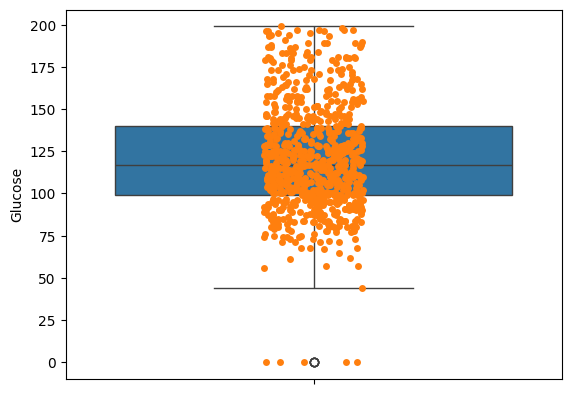

In [6]:
sns.boxplot(data=df["Glucose"])
sns.stripplot(data=df["Glucose"])

##### As we can see few data are below lower fence

#### Outlier visualization of BloodPressure

<Axes: ylabel='BloodPressure'>

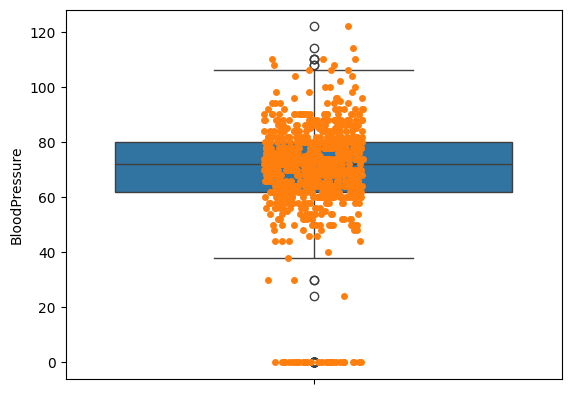

In [7]:
sns.boxplot(data=df["BloodPressure"])
sns.stripplot(data=df["BloodPressure"])

##### As we can see few data are below lower fence as well few are above upper fence

#### Outlier visualization of SkinThickness

<Axes: ylabel='SkinThickness'>

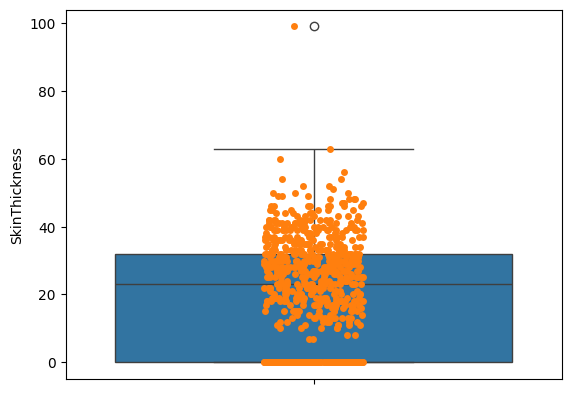

In [8]:
sns.boxplot(data=df["SkinThickness"])
sns.stripplot(data=df["SkinThickness"])

##### As we can see few data are above upper fence

#### Outlier visualization of Insulin

<Axes: ylabel='Insulin'>

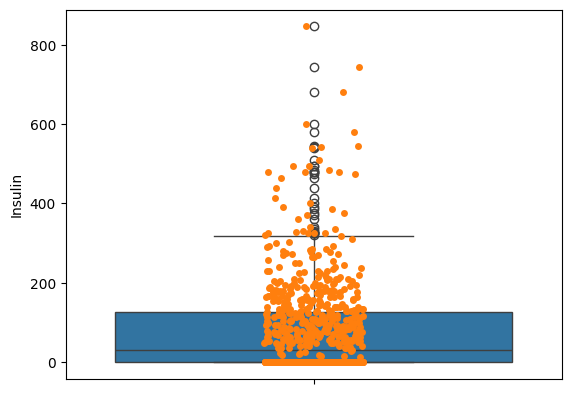

In [9]:
sns.boxplot(data=df["Insulin"])
sns.stripplot(data=df["Insulin"])

##### As we can see many data are above upper fence so we need to remove these outlier with median

In [10]:
def get_iqr(features):
    # first quartile
    q1 = np.percentile(features, 25)

    # third quartile
    q3 = np.percentile(features, 75)

    # calculating iqr
    iqr = q3 - q1


    # calculating lower and upper bound
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # return lower and upper bound value
    return lower, upper




In [11]:
def replace_outliers(data, features):
    
    # Iterate over each feature
    for feature in features:
        # Calculate the lower and upper bounds of the interquartile range (IQR)
        lower, upper = get_iqr(data[feature])
        # Define the condition for outliers
        outlier_condition = (data[feature] < lower) | (data[feature] > upper)
        # Replace outliers with the median value of the feature
        data.loc[outlier_condition, feature] = data[feature].median()
    
    return data


df = replace_outliers(data=df, features=["Insulin"])    


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_9336\1732143396.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outlier_condition, feature] = data[feature].median()


#### Outlier visualization after replacing with median of Insulin

<Axes: ylabel='Insulin'>

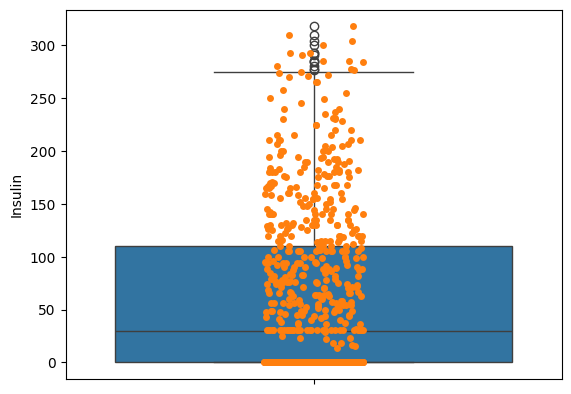

In [12]:
sns.boxplot(data=df["Insulin"])
sns.stripplot(data=df["Insulin"])

#### Outlier visualization of BMI

<Axes: ylabel='BMI'>

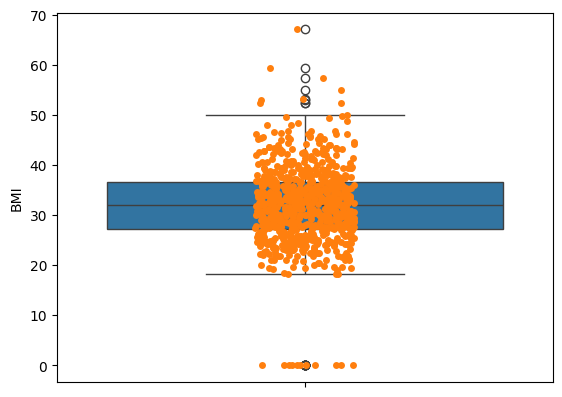

In [13]:
sns.boxplot(data=df["BMI"])
sns.stripplot(data=df["BMI"])

##### As we can see few data are below lower fence as well few are above upper fence

#### Outlier visualization of DiabetesPedigreeFunction

<Axes: ylabel='DiabetesPedigreeFunction'>

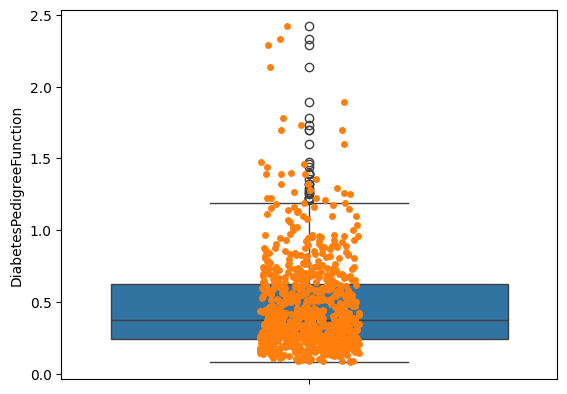

In [14]:
sns.boxplot(data=df["DiabetesPedigreeFunction"])
sns.stripplot(data=df["DiabetesPedigreeFunction"])

##### As we can see many data are above upper fence so we need to remove these outlier with median

In [15]:
df = replace_outliers(data=df, features=["DiabetesPedigreeFunction"])  

#### Outlier visualization after replacing with median of DiabetesPedigreeFunction

<Axes: ylabel='DiabetesPedigreeFunction'>

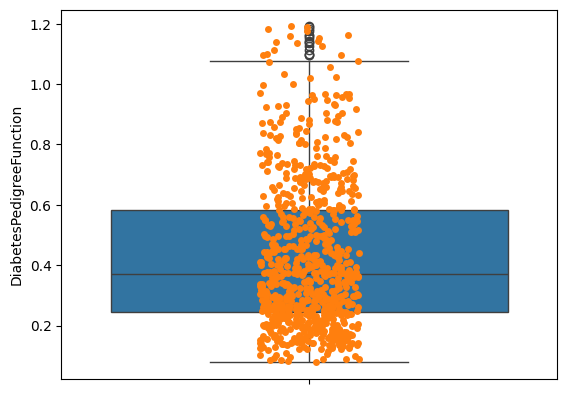

In [16]:
sns.boxplot(data=df["DiabetesPedigreeFunction"])
sns.stripplot(data=df["DiabetesPedigreeFunction"])

#### Outlier visualization of Age

<Axes: ylabel='Age'>

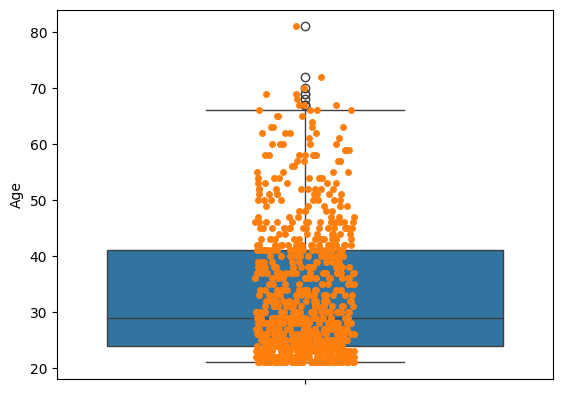

In [17]:
sns.boxplot(data=df["Age"])
sns.stripplot(data=df["Age"])

##### As we can see few data are above upper fence

# Saving the cleaned dataset

In [18]:
df.to_csv("cleaned_dataset.csv", index=False)